<a href="https://colab.research.google.com/github/Hamdan070905/AI-ML-Task-1/blob/main/AI%20ML%20task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
df = pd.read_csv('AI ML Task.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [10]:
df.fillna(df.mean(numeric_only=True),inplace=True)
print(df)
print(df.head())


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [12]:
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df)


     PassengerId  Survived  Pclass  Name  Sex        Age  SibSp  Parch  \
0              1         0       3   108    1  22.000000      1      0   
1              2         1       1   190    0  38.000000      1      0   
2              3         1       3   353    0  26.000000      0      0   
3              4         1       1   272    0  35.000000      1      0   
4              5         0       3    15    1  35.000000      0      0   
..           ...       ...     ...   ...  ...        ...    ...    ...   
886          887         0       2   548    1  27.000000      0      0   
887          888         1       1   303    0  19.000000      0      0   
888          889         0       3   413    0  29.699118      1      2   
889          890         1       1    81    1  26.000000      0      0   
890          891         0       3   220    1  32.000000      0      0   

     Ticket     Fare  Cabin  Embarked  
0       523   7.2500    147         2  
1       596  71.2833     81    

In [20]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df)
print("Means after scaling:\n", df[numerical_cols].mean())
print("\nStandard deviations after scaling:\n", df[numerical_cols].std())



     PassengerId  Survived    Pclass      Name       Sex           Age  \
0      -1.730108 -0.789272  0.827377 -1.310217  0.737695 -5.924806e-01   
1      -1.726220  1.266990 -1.566107 -0.991410 -1.355574  6.387890e-01   
2      -1.722332  1.266990  0.827377 -0.357685 -1.355574 -2.846632e-01   
3      -1.718444  1.266990 -1.566107 -0.672604 -1.355574  4.079260e-01   
4      -1.714556 -0.789272  0.827377 -1.671790  0.737695  4.079260e-01   
..           ...       ...       ...       ...       ...           ...   
886     1.714556 -0.789272 -0.369365  0.400452  0.737695 -2.077088e-01   
887     1.718444  1.266990 -1.566107 -0.552079 -1.355574 -8.233437e-01   
888     1.722332 -0.789272  0.827377 -0.124412 -1.355574 -1.953793e-16   
889     1.726220  1.266990 -1.566107 -1.415189  0.737695 -2.846632e-01   
890     1.730108 -0.789272  0.827377 -0.874774  0.737695  1.770629e-01   

        SibSp     Parch    Ticket      Fare     Cabin  Embarked  
0    0.432793 -0.473674  0.918966 -0.502445  

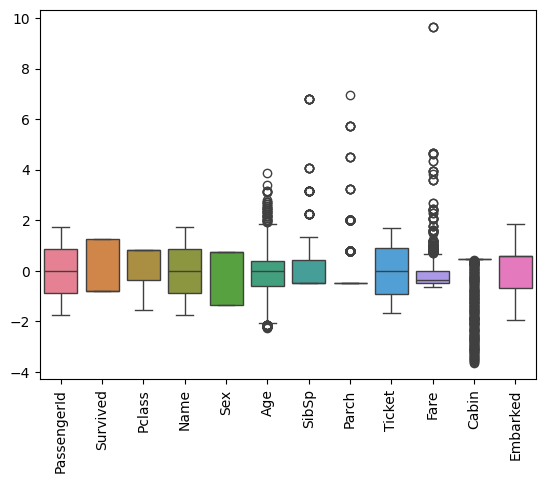

In [21]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [23]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[numerical_cols])) < 3).all(axis=1)]
print(df)

     PassengerId  Survived    Pclass      Name       Sex       Age     SibSp  \
0      -1.730108 -0.789272  0.827377 -1.310217  0.737695 -0.592481  0.432793   
1      -1.726220  1.266990 -1.566107 -0.991410 -1.355574  0.638789  0.432793   
2      -1.722332  1.266990  0.827377 -0.357685 -1.355574 -0.284663 -0.474545   
3      -1.718444  1.266990 -1.566107 -0.672604 -1.355574  0.407926  0.432793   
4      -1.714556 -0.789272  0.827377 -1.671790  0.737695  0.407926 -0.474545   
..           ...       ...       ...       ...       ...       ...       ...   
883     1.702893 -0.789272 -0.369365 -1.492947  0.737695 -0.130754 -0.474545   
884     1.706781 -0.789272  0.827377  1.352983  0.737695 -0.361618 -0.474545   
886     1.714556 -0.789272 -0.369365  0.400452  0.737695 -0.207709 -0.474545   
889     1.726220  1.266990 -1.566107 -1.415189  0.737695 -0.284663 -0.474545   
890     1.730108 -0.789272  0.827377 -0.874774  0.737695  0.177063 -0.474545   

        Parch    Ticket      Fare     C